In [411]:
import cv2

In [412]:
import seaborn as sns

In [413]:
import math

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import keras

## Experiment 1

In [415]:
from keras.datasets import mnist

In [416]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [417]:
def zoom(image):
    return cv2.resize(image,(200,200))

In [418]:
idx=np.random.randint(0,60000)
image=x_train[idx]
#sirf isliye kiya kyuki 28x28 bohot chhota lag rha tha 
z_image=zoom(image)
cv2.imshow('og_image',z_image)
cv2.waitKey(0)

-1

# greyscale

In [7]:
def greyscale(image):
    og_shape=image.shape
    flat_img=image.flatten()
    L=flat_img.max()
    new_img=[]
    for pixel in flat_img:
        new_img.append(L-1-pixel)
    return np.array(new_img).reshape(og_shape).astype(np.uint8)
        
    

In [8]:
grey_image=greyscale(image)

In [9]:
#sirf isliye kiya kyuki 28x28 bohot chhota lag rha tha 
zoom_gimg=zoom(grey_image)
cv2.imshow('grey_image',zoom_gimg)
cv2.waitKey(0)

-1

# cropping

In [10]:
#x,y starting coordinates hain(jaha se crop shuru hoga) uske baad kitna height aur width is h,w
def image_crop(image,x,y,h,w):
    return image[x:x+w][y:y+h]

In [11]:
cropped_image=image_crop(image,3,3,20,20)

In [12]:
cv2.imshow('crop_image',zoom(cropped_image))
cv2.waitKey(0)

-1

# Arithmetic operations

In [26]:
def add(image1,image2):
    return image1+image2
def sub(image1,image2):
    return image1-image2
def mult(image1,image2):
    return image1*image2
def div(image1,image2):
    return image1/image2
def blend(image1,image2,alpha):
    return(alpha*image1 + (1-alpha)*image2)

In [27]:
idx=np.random.randint(0,60000,2)
image1=x_train[idx[0]]
image2=x_train[idx[1]]


In [15]:

cv2.imshow('image1',zoom(image1))
cv2.imshow('image2',zoom(image2))
cv2.imshow('add',zoom(add(image1,image2)))
cv2.imshow('sub',zoom(sub(image1,image2)))
cv2.imshow('mult',zoom(mult(image1,image2)))
cv2.imshow('div',zoom(div(image1,image2)))
cv2.imshow('blend',zoom(blend(image1,image2,0.5)))
cv2.waitKey(0)

C:\Users\jayva\AppData\Local\Temp\ipykernel_16188\4224361394.py:8: RuntimeWarning: divide by zero encountered in divide
  return image1/image2
C:\Users\jayva\AppData\Local\Temp\ipykernel_16188\4224361394.py:8: RuntimeWarning: invalid value encountered in divide
  return image1/image2


-1

# logical operations

In [25]:
def Aand(image1,image2):
    return np.bitwise_and(image1,image2)
def Aor(image1,image2):
    return np.bitwise_or(image1,image2)
def Anot(image1,image2):
    return np.bitwise_not(image1)
def Axor(image1,image2):
    return np.bitwise_xor(image1,image2)

In [26]:
idx=np.random.randint(0,60000,2)
image1=x_train[idx[0]]
image2=x_train[idx[1]]


In [27]:
cv2.imshow('image1',zoom(image1))
cv2.imshow('image2',zoom(image2))
cv2.imshow('and',zoom(Aand(image1,image2)))
cv2.imshow('or',zoom(Aor(image1,image2)))
cv2.imshow('not',zoom(Anot(image1,image2)))
cv2.imshow('xor',zoom(Axor(image1,image2)))

cv2.waitKey(0)

-1

# bitwise l,r shift

In [28]:
def bls(image,n):
    return np.left_shift(image,n)
def brs(image,n):
    return np.right_shift(image,n)

In [35]:
#if yeh allow nahi kiya then iterate through each elem and do
#pixel_value<<n for left_shift
# >>n for right shift

In [36]:
idx=np.random.randint(0,60000)
image=x_train[idx]

In [37]:
cv2.imshow('image',zoom(image))
cv2.imshow('bls',zoom(bls(image,3)))
cv2.imshow('brs',zoom(brs(image,3)))
cv2.waitKey(0)

-1

## Experiment 2

In [207]:
idx=np.random.randint(0,60000)
image=x_train[idx]


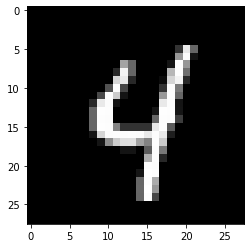

In [208]:
plt.imshow(image,cmap='gray')

In [209]:
def thresholding(image,t):
    og_shape=image.shape
    temp_img=image.flatten()
    new_image=[]
    for pixel in temp_img:
        new_image.append(pixel>=t)
    return np.array(new_image).reshape(og_shape)

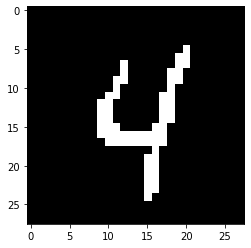

In [210]:
i1=thresholding(image,127)
plt.imshow(i1,cmap='gray')

In [211]:
def slice_wback(image,a,b):
    og_shape=image.shape
    temp_img=image.flatten()
    new_image=[]
    L=image.max()
    for pixel in temp_img:
        if(pixel<b and pixel>a):
            new_image.append(L)
        else:
            new_image.append(pixel)
    return np.array(new_image).reshape(og_shape)

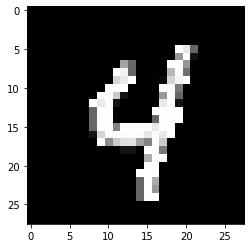

In [212]:
i2=slice_wback(image,20,100)
plt.imshow(i2,cmap='gray')

In [213]:
def slice_woback(image,a,b):
    og_shape=image.shape
    temp_img=image.flatten()
    new_image=[]
    L=image.max()
    for pixel in temp_img:
        if(pixel<b and pixel>a):
            new_image.append(L)
        else:
            new_image.append(0)
    return np.array(new_image).reshape(og_shape)

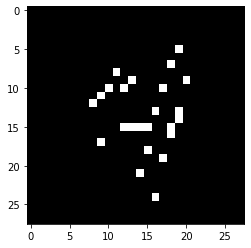

In [214]:
i3=slice_woback(image,20,100)
plt.imshow(i3,cmap='gray')

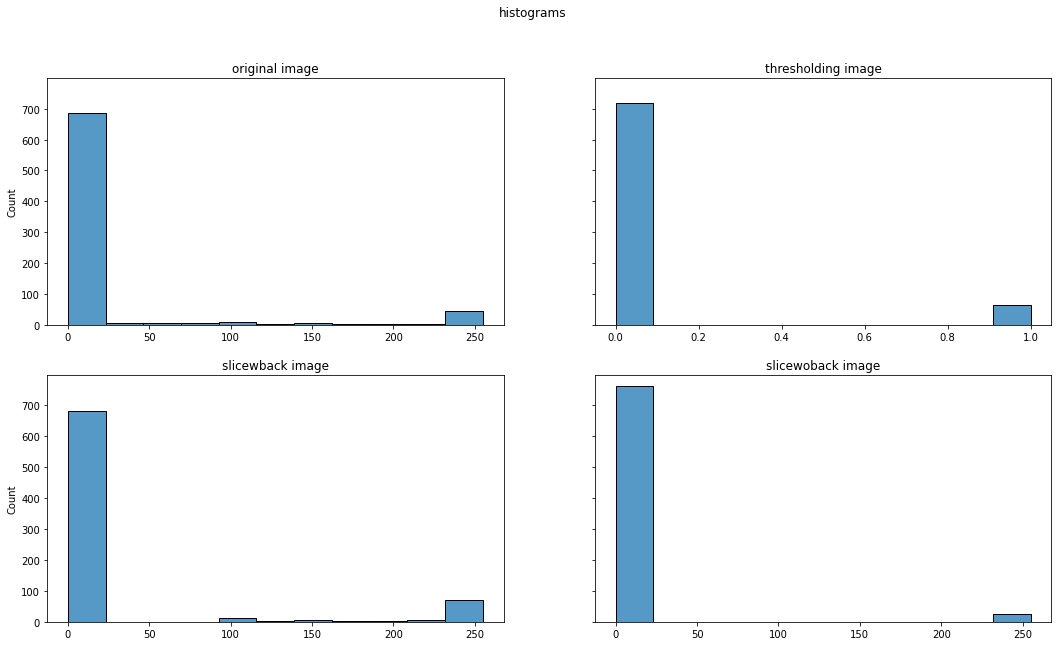

In [215]:
fig,axes=plt.subplots(2,2,figsize=(18,10),sharey=True)
fig.suptitle('histograms')

sns.histplot(ax=axes[0,0],data=image.flatten())
axes[0,0].title.set_text('original image')
sns.histplot(ax=axes[0,1],data=i1.flatten())
axes[0,1].title.set_text('thresholding image')
sns.histplot(ax=axes[1,0],data=i2.flatten())
axes[1,0].title.set_text('slicewback image')
sns.histplot(ax=axes[1,1],data=i3.flatten())
axes[1,1].title.set_text('slicewoback image')

## Experiment 3

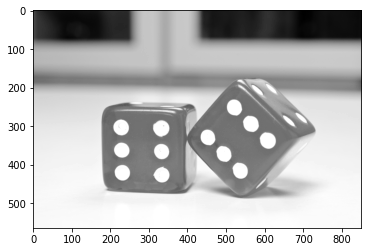

In [184]:
image=cv2.imread('dice.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [185]:
def contrast_strech(image,s1,s2,r1,r2):
    og_shape=image.shape
    temp_img=image.flatten()
    new_img=[]
    alpha=s1/r1
    beta=(s2-s1)/(r2-r1)
    gamma=(255-s2)/(255-r2)
    for pixel in temp_img:
        if(pixel<r1):
            new_img.append(alpha*pixel)
        elif(pixel>=r1 and pixel<r2):
            new_img.append(beta*(pixel-r1)+s1)
        else:
            new_img.append(gamma*(pixel-r2)+s2)
    return np.array(new_img).reshape(og_shape)
            
        

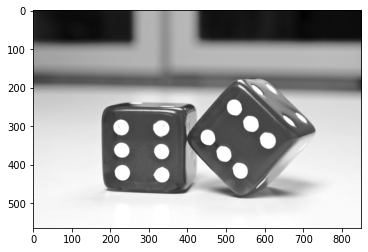

In [186]:
cs=contrast_strech(image,20,60,10,100)
plt.imshow(cs,cmap='gray')

In [187]:
def log_transform(image,c):
    og_shape=image.shape
    temp_img=image.flatten()
    new_img=[]
    for pixel in temp_img:
        #round() daalna bhulna mat
        new_img.append(round(c*np.log(1+pixel)))
    return np.array(new_img).reshape(og_shape)

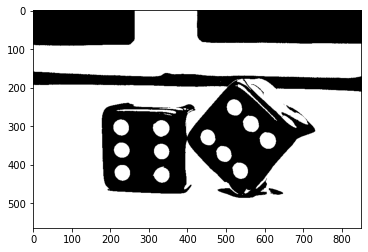

In [188]:
lt=log_transform(image,0.3)
plt.imshow(lt,cmap='gray')

In [189]:
def power_transform(image,c,gamma):
    og_shape=image.shape
    temp_img=image.flatten()
    new_img=[]
    for pixel in temp_img:
        new_img.append(round(c*math.pow(pixel,gamma)))
    return np.array(new_img).reshape(og_shape)

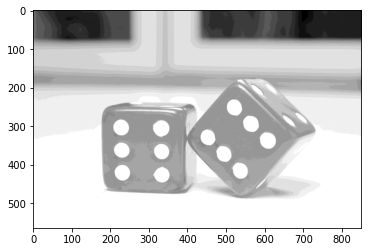

In [190]:
pt=power_transform(image,0.7,0.6)
plt.imshow(pt,cmap='gray')

## Experiment 4

In [48]:
import scipy

In [72]:
from scipy.ndimage import correlate

In [191]:
def add_gaussian_noise(image,mean,stdev):
    noise=np.random.normal(mean,stdev,image.shape)
    new_image=image + noise
    return new_image

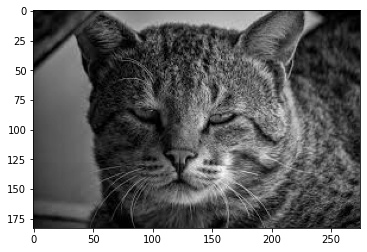

In [192]:
image=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

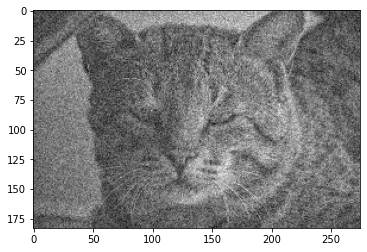

In [193]:
gnoise_img=add_gaussian_noise(image,20,34)
plt.imshow(gnoise_img,cmap='gray')

In [194]:
def average_filter(image,mask):
    row,column=image.shape
    mh,mw=mask.shape
    filtered_image=np.zeros(image.shape)
    for i in range(row-mh+1):
        for j in range(column-mw+1):
            rows=range(i,i+mh)
            columns=range(j,j+mw)
            part=image[np.ix_(rows,columns)]*mask
            filtered_image[i,j]=part.sum()
    return np.array(filtered_image)
    

In [195]:
mask=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

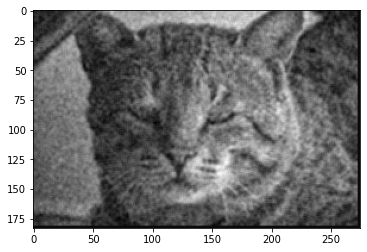

In [196]:
plt.imshow(average_filter(gnoise_img,mask),cmap='gray')

In [197]:
def add_SnP_noise(image):
    n=5000#can be taken at random
    x=np.random.randint(0,image.shape[0],n)
    y=np.random.randint(0,image.shape[1],n)
    new_image=image
    for i in range(len(x)):
        new_image[x[i]][y[i]]=np.random.choice(a=[0,1])
    return new_image
        
        
        

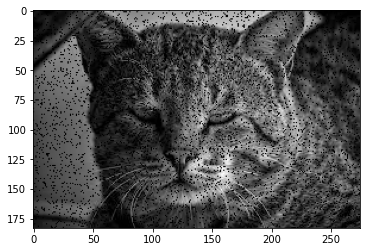

In [198]:
snp_image=add_SnP_noise(image)
plt.imshow(snp_image,cmap='gray')

In [199]:
def median_filtering(image):
    row,column=image.shape
    mh,mw=3,3
    new_image=np.zeros((row,column))
    for i in range(row-mw+1):
        for j in range(column-mh+1):
            rows=range(i,i+mw)
            columns=range(j,j+mh)
            part=np.sort(np.ravel(image[np.ix_(rows,columns)]))
            new_image[i,j]=part[5]
            
    return new_image

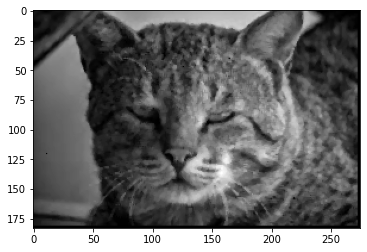

In [200]:
med_image=median_filtering(snp_image)
plt.imshow(med_image,cmap='gray')

## Experiment 5

In [201]:
def apply_filter(image,mask):
    row,column=image.shape
    mw,mh=mask.shape
    filtered_image=np.zeros(image.shape)
    for i in range(row-mw+1):
        for j in range(column-mh+1):
            rows=range(i,i+mw)
            columns=range(j,j+mh)
            part=image[np.ix_(rows,columns)]*mask
            filtered_image[i,j]=part.sum()
    return filtered_image

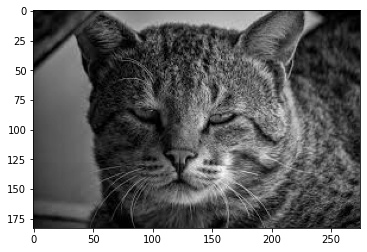

In [202]:
image=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [203]:
def high_pass_filter(image):
    return(apply_filter(image,np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])))
    

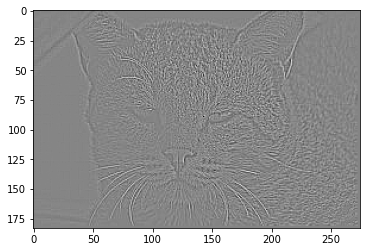

In [204]:
high_pass_image=high_pass_filter(image)
plt.imshow(high_pass_image,cmap='gray')

In [205]:
def  high_boost_filter(image,A):
    return (A-1)*image+ high_pass_filter(image)

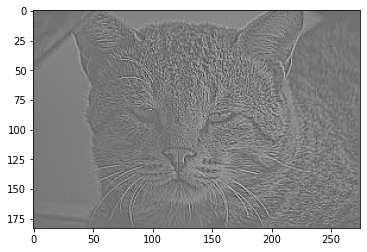

In [206]:
hbf=high_boost_filter(image,2)
plt.imshow(hbf,cmap='gray')

## Experiment 6

In [219]:
def hist_equalization(image):
    hist,bins=np.histogram(image.flatten(),bins=256,range=[0,256])
    cdf=hist.cumsum()
    normalized_cdf=(cdf-cdf.min())*255/(cdf.max()-cdf.min())
    equalized_image=np.interp(image.flatten(),bins[:-1],normalized_cdf).reshape(image.shape)
    return equalized_image

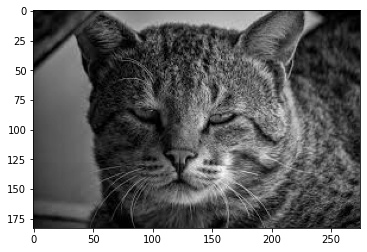

In [221]:
image=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

<Axes: ylabel='Count'>

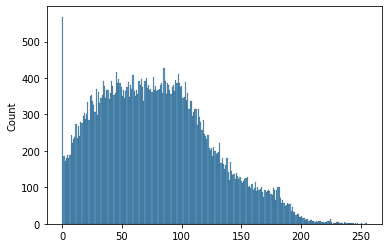

In [237]:
sns.histplot(image.flatten(),bins=256)

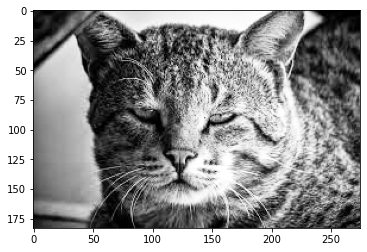

In [222]:
eq_image=hist_equalization(image)
plt.imshow(eq_image,cmap='gray')

<Axes: ylabel='Count'>

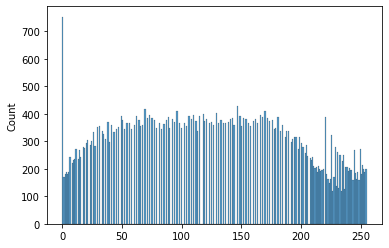

In [236]:
sns.histplot(eq_image.flatten(),bins=256)

In [223]:
def hist_streching(image,l,h):
    return np.clip(((h-l)*(image-image.min())/(image.max()-image.min()))+l,0,255)
        

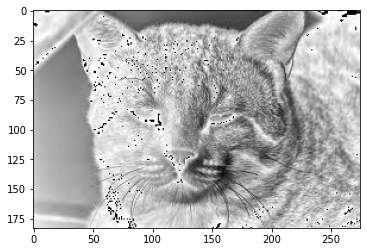

In [232]:
strech_img=hist_streching(image,0,255)
plt.imshow(strech_img,cmap='gray')

<Axes: ylabel='Count'>

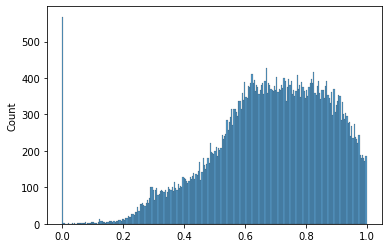

In [234]:
sns.histplot(strech_img.flatten(),bins=256)

## Experiment 7

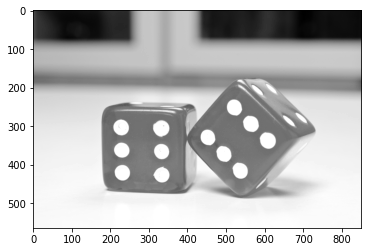

In [117]:
image=cv2.imread('dice.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [118]:
image.shape

(564, 851)

In [119]:
#multiply by (-1)^(x+y)
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image
            

In [120]:
def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6
            
                
                               
    
    

In [121]:
def fft(image):
    return np.fft.fft2(image)

In [122]:
def invfft(image):
    return np.fft.ifft2(image)

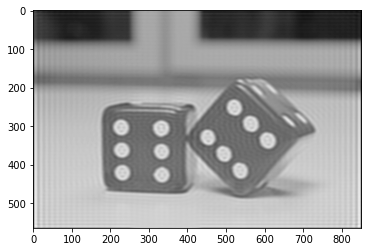

In [142]:
lp_image = ideal_lp_filter(image,60)
plt.imshow(lp_image, cmap='gray')

In [124]:
def ideal_hp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))>t)
    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

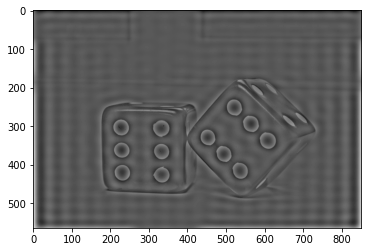

In [138]:
hp_image = ideal_hp_filter(image,20)
plt.imshow(hp_image, cmap='gray')

In [143]:
def gaussian_lp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
            
    
    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

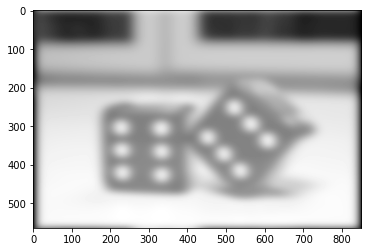

In [144]:
lp_gimage = gaussian_lp_filter(image,20)
plt.imshow(lp_gimage, cmap='gray')

In [145]:
def gaussian_hp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=1-(np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2))))
            
    
    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

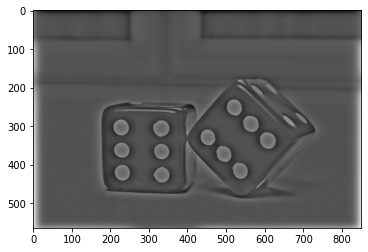

In [146]:
hp_gimage = gaussian_hp_filter(image,20)
plt.imshow(hp_gimage, cmap='gray')

## Experiment 8

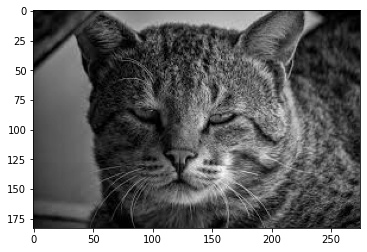

In [176]:
image=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [177]:
binary_image=np.where(image >127,1,0)

In [178]:
def erosion(image,mask):
    eroded_image=np.zeros_like(image)
    row_pad=mask.shape[0]//2
    col_pad=mask.shape[1]//2
    padded_image=np.pad(image,((row_pad,row_pad),(col_pad,col_pad)))
    kernel_mask=(mask==1)
    for i in range(row_pad,image.shape[0]+row_pad):
        for j in range(col_pad,image.shape[1]+col_pad):
            sub_array=padded_image[i-row_pad:i+row_pad+1,j-col_pad:j+col_pad+1]
            if(np.all(sub_array[kernel_mask])):
                eroded_image[i-row_pad][j-col_pad]=1
    return eroded_image

In [179]:
eroded_img=erosion(binary_image,np.array([[0,1,0],[1,1,1],[0,1,0]]))

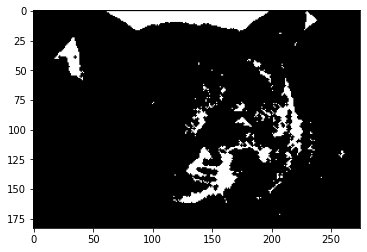

In [180]:
plt.imshow(eroded_img,cmap='gray')

In [181]:
def dilation(image,mask):
    dilated_image=np.zeros_like(image)
    row_pad=mask.shape[0]//2
    col_pad=mask.shape[1]//2
    padded_image=np.pad(image,((row_pad,row_pad),(col_pad,col_pad)))
    kernel_mask=(mask==1)
    for i in range(row_pad,image.shape[0]+row_pad):
        for j in range(col_pad,image.shape[1]+col_pad):
            sub_array=padded_image[i-row_pad:i+row_pad+1,j-row_pad:j+row_pad+1]
            if(np.any(sub_array[kernel_mask])):
                dilated_image[i-row_pad,j-row_pad]=1
    return dilated_image
                

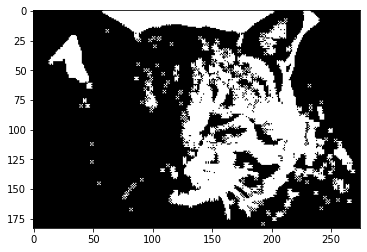

In [182]:
dilated_img=dilation(binary_image,np.array([[1,0,1],[0,1,0],[1,0,1]]))
plt.imshow(dilated_img,cmap='gray')

In [183]:
def opening(image,mask):
    return dilation(erosion(image,mask),mask)

In [184]:
def closing(image,mask):
    return erosion(dilation(image,mask),mask)

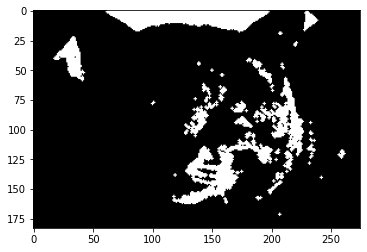

In [185]:
open_img=opening(binary_image,np.array([[0,1,0],[1,1,1],[0,1,0]]))
plt.imshow(open_img,cmap='gray')

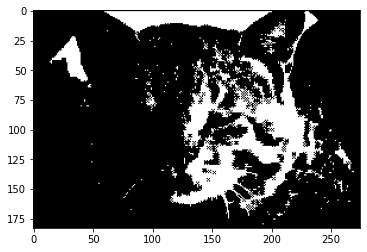

In [187]:
close_img=closing(binary_image,np.array([[1,0,1],[0,1,0],[1,0,1]]))
plt.imshow(close_img,cmap='gray')

In [222]:
def hmt(image,b1,b2):
    image_c=np.where(image==0,1,0)
    return np.bitwise_and(erosion(image,b1),erosion(image_c,b2))

In [223]:
hmt_img=hmt(binary_image,np.array([[1,1,1],[0,1,0],[0,1,0]]),np.array([[0,0,0],[0,0,-1],[0,0,-1]]))

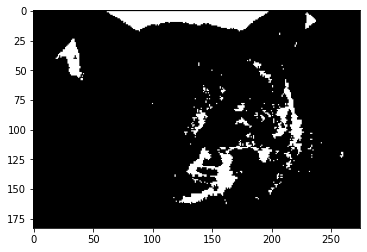

In [224]:
plt.imshow(hmt_img,cmap='gray')

## Experiment 9

In [400]:
def region_growing(image,seed,t):
    og_shape=image.shape
    grown_image=np.ones_like(image)*255
    grown_image[seed]=0
    visited=np.zeros_like(image)
    visited[seed]=1
    queue=[]
    queue=gen_nbrs(seed,queue,og_shape,visited)
    current_elem=seed
    while(queue!=[]):
        print(queue)
        current_elem=queue.pop(0)
        if(visited[current_elem]==0):
            if(abs(image[current_elem]-image[seed])<=t):
                grown_image[current_elem]=0
                visited[current_elem]=1
                
            else:
                visited[current_elem]=1
        queue=gen_nbrs(current_elem,queue,og_shape,visited)
    return grown_image
        
        

In [406]:
idx=np.random.randint(0,60000)
image=x_train[idx]

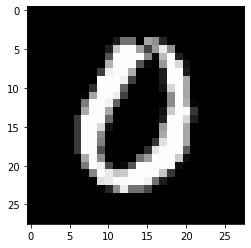

In [407]:
plt.imshow(image,cmap='gray')

In [408]:
def gen_nbrs(current_elem,queue,og_shape,visited):
    x=current_elem[0]
    y=current_elem[1]
    #assuming 4-connectivity
    nbrs=[(x+1,y),(x,y+1),(x-1,y),(x,y-1)]
    for i,j in nbrs:
        if(i>=0 and i<og_shape[0] and j>=0 and j<og_shape[1]):
            if(visited[(i,j)]==0):
                queue.append((i,j))
    queue=set(queue)
    queue=list(queue)
    return queue
                

In [409]:
grown_img=region_growing(image,(14,14),0.5)

[(14, 13), (13, 14), (14, 15), (15, 14)]
[(13, 14), (15, 14), (15, 13), (13, 13), (14, 12), (14, 15)]
[(15, 14), (15, 13), (13, 13), (14, 12), (13, 15), (14, 15), (12, 14)]
[(15, 13), (13, 13), (16, 14), (14, 12), (13, 15), (14, 15), (12, 14), (15, 15)]
[(16, 13), (13, 13), (13, 15), (14, 12), (16, 14), (15, 12), (14, 15), (12, 14), (15, 15)]
[(17, 13), (13, 13), (16, 14), (16, 12), (14, 12), (13, 15), (15, 12), (14, 15), (12, 14), (15, 15)]
[(18, 13), (16, 12), (16, 14), (13, 13), (17, 12), (14, 12), (13, 15), (15, 12), (14, 15), (17, 14), (12, 14), (15, 15)]
[(13, 13), (16, 12), (19, 13), (17, 12), (13, 15), (18, 12), (14, 12), (18, 14), (16, 14), (15, 12), (14, 15), (17, 14), (12, 14), (15, 15)]
[(12, 13), (16, 12), (19, 13), (16, 14), (17, 12), (18, 12), (13, 12), (15, 15), (14, 12), (13, 15), (15, 12), (14, 15), (17, 14), (12, 14), (18, 14)]
[(11, 13), (16, 12), (19, 13), (17, 12), (13, 15), (18, 12), (12, 12), (13, 12), (14, 12), (18, 14), (16, 14), (15, 12), (14, 15), (17, 14), 

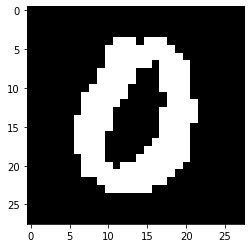

In [410]:
plt.imshow(grown_img,cmap='gray')

# region splitting and merging


In [421]:
new_image=np.ones_like(image)*255
t=50


In [433]:
def check(r1,r2,c1,c2,t):
    temp_img=image[r1:r2+1,c1:c2+1]
    if(temp_img.max()-temp_img.min()<=t):
        return True
    
    

In [ ]:
def split(r1,r2,c1,c2):
    if(check(r1,r2,c1,c2)):
        return new_image[r1:r2+1,c1:c2+1]=0
    else:
        split(r1//2,r2//2,c1//2,c2//2)